In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Using domain knowledge we can conclude that the max price is 12000000 is the price per sq ft which is a very high price. this means that the dataset contains various outliers.

Text(0, 0.5, 'Count')

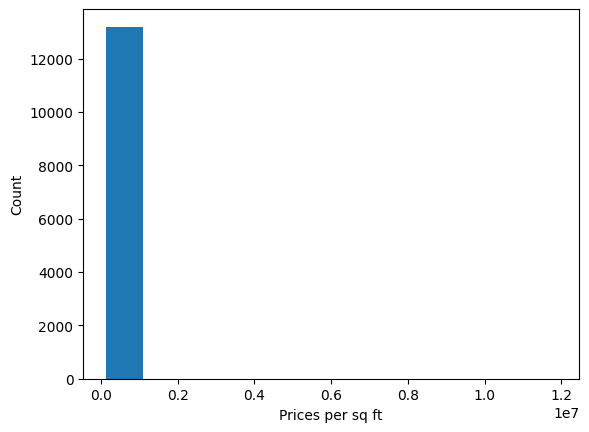

In [4]:
plt.hist(df.price_per_sqft, bins=10, rwidth=0.8)
plt.xlabel("Prices per sq ft")
plt.ylabel("Count")

The upper graph shows that a particular value contains more than 12000 values

Text(0, 0.5, 'Count')

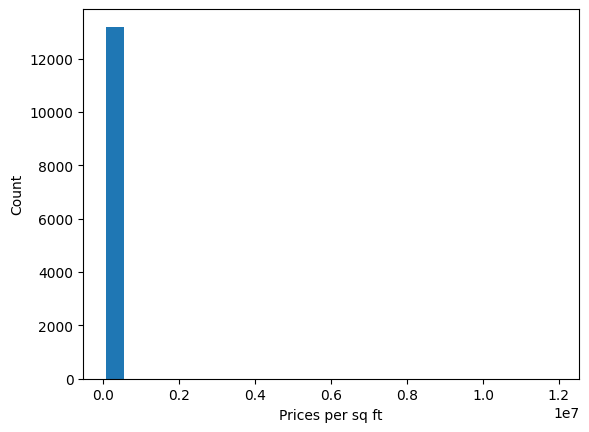

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel("Prices per sq ft")
plt.ylabel("Count")

In [12]:
upper_threshold, lower_threshold = df["price_per_sqft"].quantile([0.999, 0.001])
upper_threshold, lower_threshold 

(50959.36200000098, 1366.184)

In [16]:
outliers = df[(df["price_per_sqft"]>upper_threshold) | (df["price_per_sqft"]<lower_threshold)]
outliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [18]:
df2 = df[(df["price_per_sqft"]<upper_threshold) & (df["price_per_sqft"]>lower_threshold)]
df2.shape

(13172, 7)

In [19]:
df.shape[0] - df2.shape[0]

28

Hence, we removed 28 outliers

Now removing using 4 standard deviation

In [24]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [26]:
df3 = df2[(df2["price_per_sqft"]>min_limit) & (df2["price_per_sqft"]<max_limit)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [28]:
df2.shape[0]- df3.shape[0]

125

Here, we have removed 125 outliers

Text(0, 0.5, 'Count')

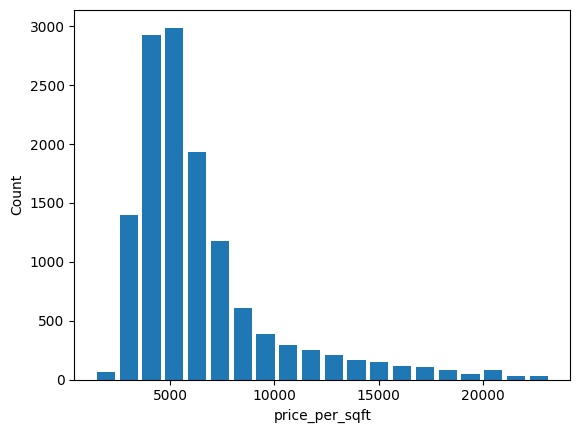

In [29]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("Count")


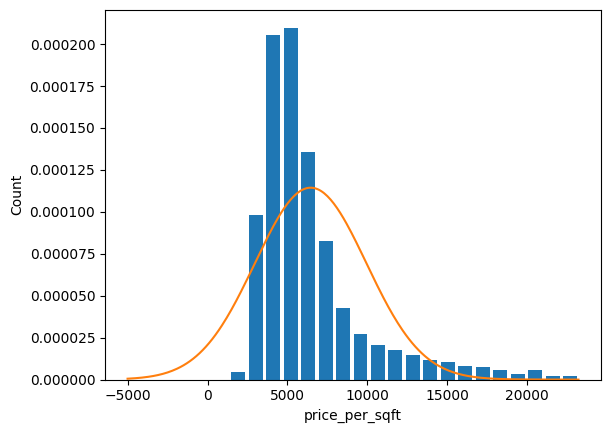

In [32]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel("price_per_sqft")
plt.ylabel("Count")

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

plt.show()


Now removing the outliers using z score

In [35]:
df2['z_score'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2

C:\Users\HP\AppData\Local\Temp\ipykernel_6616\572463396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z_score'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [37]:
outliers_z = df2[(df2.z_score < -4) | (df2.z_score>4)]
outliers_z.shape

(125, 8)

In [38]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000,5.635409
9290,other,4 Bedroom,2400.0,3.0,750.0,4,31250,5.937267
3935,other,4 Bedroom,2360.0,4.0,600.0,4,25423,4.530126
9229,1st Phase JP Nagar,4 Bedroom,1200.0,4.0,300.0,4,25000,4.427977
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148,5.188176


In [41]:
df4 = df2[(df2.z_score>-4) & (df2.z_score<4)]
df4.head()
df4.shape

(13047, 8)

In [42]:
df2.shape[0] - df4.shape[0]

125

Hence, the number of outliers are verified by z score and standard deviation.